# Import Library

In [1]:
import pandas as pd
import numpy as np

# 1. Menyertakan Prefix, Suffix, dan Memilih Baris

## 1.1 Generate Dataframe

In [4]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size=(n_rows,n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,2,5,2,8,2
1,7,6,2,4,8
2,7,9,5,8,8
3,5,9,2,9,3
4,7,5,2,1,6
5,3,8,6,9,2
6,2,4,6,5,5
7,6,7,6,9,9
8,7,3,4,5,5
9,6,5,8,1,4


## 1.2 Menyertakan Prefix dan Suffix Pada Kolom

In [5]:
df.add_prefix('kolom_')
df.add_suffix('field_')

,Afield_,Bfield_,Cfield_,Dfield_,Efield_
0,2,5,2,8,2
1,7,6,2,4,8
2,7,9,5,8,8
3,5,9,2,9,3
4,7,5,2,1,6
5,3,8,6,9,2
6,2,4,6,5,5
7,6,7,6,9,9
8,7,3,4,5,5
9,6,5,8,1,4


## 1.3 Pemilihan Baris (Row Selection)

In [6]:
df[df['A'].isin([1,3,6])]
df[~df['A'].isin([1,3])]

,A,B,C,D,E
0,2,5,2,8,2
1,7,6,2,4,8
2,7,9,5,8,8
3,5,9,2,9,3
4,7,5,2,1,6
6,2,4,6,5,5
7,6,7,6,9,9
8,7,3,4,5,5
9,6,5,8,1,4


# 2. Konversi Data

## 2.1 Generate Data

In [7]:
data = {
    'col1':['1', '2', '3', 'teks'],
    'col2':['1', '2', '3', '4']
}

df = pd.DataFrame(data)
df

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [8]:
df.dtypes

col1    object
col2    object
dtype: object

## 2.2 Konversi tipe data dengna fungsi astype()

In [9]:
df_x = df.astype({'col2': 'float'})
df_x

,col1,col2
0,1,1.0
1,2,2.0
2,3,3.0
3,teks,4.0


In [10]:
df_x.dtypes

col1     object
col2    float64
dtype: object

## 2.3 Konversi tipe data numberik dengan fungsi to_numeric()

In [11]:
df.apply(pd.to_numeric, errors='coerce')

,col1,col2
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4


# 3. Pemilihan kolom (coloumns selection) pada Pandas Dataframe berdasarkan tipe data

## 3.1 Generate Dataframe

In [12]:
n_rows = 5
n_cols = 2
cols = ['bil_pecahan', 'bil_bulat']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),
                  columns=cols)
df['bil_pecahan'] = df['bil_pecahan'].astype('float')

dt = pd.date_range('2023-05-10', periods=(n_rows), freq='H')
df.index = pd.to_datetime(dt, format='%d%b%Y:%H:%M:%S.%f')

df['teks'] = list('ABCDE')

df

,bil_pecahan,bil_bulat,teks
2023-05-10 00:00:00,14.0,17,A
2023-05-10 01:00:00,15.0,18,B
2023-05-10 02:00:00,9.0,16,C
2023-05-10 03:00:00,10.0,13,D
2023-05-10 04:00:00,6.0,2,E


In [13]:
df.dtypes

bil_pecahan    float64
bil_bulat        int32
teks            object
dtype: object

## 3.2 Memilih kolom bertipe data `numerik`

In [14]:
df.select_dtypes(include='number')

,bil_pecahan,bil_bulat
2023-05-10 00:00:00,14.0,17
2023-05-10 01:00:00,15.0,18
2023-05-10 02:00:00,9.0,16
2023-05-10 03:00:00,10.0,13
2023-05-10 04:00:00,6.0,2


In [15]:
df.select_dtypes(include='float')

,bil_pecahan
2023-05-10 00:00:00,14.0
2023-05-10 01:00:00,15.0
2023-05-10 02:00:00,9.0
2023-05-10 03:00:00,10.0
2023-05-10 04:00:00,6.0


In [16]:
df.select_dtypes(include='int')

,bil_bulat
2023-05-10 00:00:00,17
2023-05-10 01:00:00,18
2023-05-10 02:00:00,16
2023-05-10 03:00:00,13
2023-05-10 04:00:00,2


## 3.3 Memilih kolom bertipe data `string` atau `object`

In [17]:
df.select_dtypes(include='object')

,teks
2023-05-10 00:00:00,A
2023-05-10 01:00:00,B
2023-05-10 02:00:00,C
2023-05-10 03:00:00,D
2023-05-10 04:00:00,E


## 3.4 Memilih kolm bertipe data `datetime`

## 3.5 Milih kolom dengan kombinasi tipe data

In [18]:
df.select_dtypes(include=['number', 'object'])

,bil_pecahan,bil_bulat,teks
2023-05-10 00:00:00,14.0,17,A
2023-05-10 01:00:00,15.0,18,B
2023-05-10 02:00:00,9.0,16,C
2023-05-10 03:00:00,10.0,13,D
2023-05-10 04:00:00,6.0,2,E


In [19]:
df.select_dtypes(include='datetime')

""
2023-05-10 00:00:00
2023-05-10 01:00:00
2023-05-10 02:00:00
2023-05-10 03:00:00
2023-05-10 04:00:00


# 4. Membalik Urutan Baris dan Kolom Pada Dataframe

## 4.1 Generate Dataframe

In [20]:
n_rows = 5
n_cols = 5

cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,1,8,7,7,5
1,7,1,1,5,7
2,2,5,8,4,9
3,3,7,4,6,7
4,6,8,6,8,5


## 4.2 Membalik urutan kolom

In [21]:
df.loc[:, ::-1]
## df.loc[mengatur baris, mengatur kolom]


,E,D,C,B,A
0,5,7,7,8,1
1,7,5,1,1,7
2,9,4,8,5,2
3,7,6,4,7,3
4,5,8,6,8,6


## 4.3 Membalik urutan baris

In [22]:
df.loc[::-1]

,A,B,C,D,E
4,6,8,6,8,5
3,3,7,4,6,7
2,2,5,8,4,9
1,7,1,1,5,7
0,1,8,7,7,5


## 4.4 Membalik urutan baris dan melakukan penyesuaian `index`

In [23]:
df.loc[::-1].reset_index(drop=True)

,A,B,C,D,E
0,6,8,6,8,5
1,3,7,4,6,7
2,2,5,8,4,9
3,7,1,1,5,7
4,1,8,7,7,5


# 5. Mengganti Nama Kolom dari Dataframe

## 5.1 Generate Dataframe

In [24]:
n_rows = 5
n_cols = 5

df = pd.DataFrame(np.random.randint(1, 10, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,1,1,5,5,9
1,7,8,3,6,2
2,3,5,2,9,5
3,3,2,5,1,9
4,9,3,9,1,2


## 5.2 Mengganti nama (label) untuk sebuah kolom pada dataframe

In [25]:
df.rename(columns={'C' : 'Hobi'})

,A,B,Hobi,D,E
0,1,1,5,5,9
1,7,8,3,6,2
2,3,5,2,9,5
3,3,2,5,1,9
4,9,3,9,1,2


## 5.3 Mengganti nama (label) untuk banyak kolom dataframe

In [26]:
df.rename(columns={'A':'Nama', 'B':'Alamat', 'D':'Kota'})

,Nama,Alamat,C,Kota,E
0,1,1,5,5,9
1,7,8,3,6,2
2,3,5,2,9,5
3,3,2,5,1,9
4,9,3,9,1,2


# 6. Menghapapus `drop` missing values `NaN`

## 6.1 Generate Dataframe

In [27]:
np.random.seed(0)  # Untuk hasil yang konsisten setiap kali dijalankan
data = np.random.rand(5, 5)
data[np.random.randint(0, 5, size=5), np.random.randint(0, 3, size=5)] = np.nan

# Membuat DataFrame dari data dengan nilai yang hilang
df = pd.DataFrame(data, columns=['index', 'A', 'B', 'C', 'D'])

df

,index,A,B,C,D
0,NaN,0.715189,NaN,0.544883,0.423655
1,NaN,0.437587,NaN,0.963663,0.383442
2,0.791725,0.528895,0.568045,0.925597,0.071036
3,0.087129,0.020218,0.832620,0.778157,0.870012
4,0.978618,0.799159,0.461479,0.780529,0.118274


In [28]:
df = df.rename(columns={'index' : 'Z'})
df

,Z,A,B,C,D
0,NaN,0.715189,NaN,0.544883,0.423655
1,NaN,0.437587,NaN,0.963663,0.383442
2,0.791725,0.528895,0.568045,0.925597,0.071036
3,0.087129,0.020218,0.832620,0.778157,0.870012
4,0.978618,0.799159,0.461479,0.780529,0.118274


In [29]:
df_backup = df.copy(deep=True)

## 6.2 Menghapus `drop` setiap kolom yang mengandung missing value

In [30]:
df = df.dropna(axis='columns')
df

,A,C,D
0,0.715189,0.544883,0.423655
1,0.437587,0.963663,0.383442
2,0.528895,0.925597,0.071036
3,0.020218,0.778157,0.870012
4,0.799159,0.780529,0.118274


## 6.3 Menghapus `drop` setiap baris yang mengandung missing value

In [31]:
df = df_backup.copy(deep=True)
df = df.dropna(axis='rows')
df

,Z,A,B,C,D
2,0.791725,0.528895,0.568045,0.925597,0.071036
3,0.087129,0.020218,0.832620,0.778157,0.870012
4,0.978618,0.799159,0.461479,0.780529,0.118274


## 6.4 Presentase missing values untuk tiap kolom

In [32]:
df = df_backup.copy(deep=True)
df.isna().mean()

Z    0.4
A    0.0
B    0.4
C    0.0
D    0.0
dtype: float64

## 6.5 Menghapus `drop` tiap kolom yang mengandung missing values berdasasrkan threshold

In [33]:
treshold = len(df) * 0.9
df = df.dropna(thresh=treshold, axis='columns')
df

,A,C,D
0,0.715189,0.544883,0.423655
1,0.437587,0.963663,0.383442
2,0.528895,0.925597,0.071036
3,0.020218,0.778157,0.870012
4,0.799159,0.780529,0.118274


# 7. Memeriksa Kesamaan antar kolom (series)

## 7.1 Generate Dataframe

In [34]:
data = {
    'A': [15, 15, 18, np.nan, 12],
    'B': [15, 15, 18, np.nan, 12],
}
df = pd.DataFrame(data)
df

,A,B
0,15.0,15.0
1,15.0,15.0
2,18.0,18.0
3,NaN,NaN
4,12.0,12.0


## 7.2 Mengenal Series

In [35]:
df['A']

0    15.0
1    15.0
2    18.0
3     NaN
4    12.0
Name: A, dtype: float64

In [36]:
type(df['A'])

pandas.core.series.Series

In [37]:
type(df)

pandas.core.frame.DataFrame

## 7.3 Memeriksa kesamaan dengan operator `==`

In [38]:
df['A'] == df['B']

0     True
1     True
2     True
3    False
4     True
dtype: bool

## 7.4 Memerika kesamaan dengan method `equals()`

In [39]:
df['A'].equals(df['B'])

True

## 7.5 Memerika kesamaan antar dua dataframe

In [40]:
df1 = df.copy(deep=True)
df.equals(df1)

True

In [41]:
df == df1

,A,B
0,True,True
1,True,True
2,True,True
3,False,False
4,True,True


# 8. Membagi Dataframe menjadi dua secara acak

## 8.1 Generate Dataframe

In [42]:
n_rows = 10
n_cols = 5

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,3,1,1,5,6
1,7,9,18,16,5
2,10,11,2,2,8
3,10,4,7,12,15
4,19,1,15,4,13
5,11,12,5,7,5
6,16,4,13,5,9
7,15,16,4,16,14
8,17,18,6,10,4
9,1,6,1,18,19


## 8.2 Membagi dataframe menjadi dua secara acak berdasarkan proporsi tertentu

In [43]:
df.shape

(10, 5)

In [44]:
proporsi = 0.7
df_1 = df.sample(frac=proporsi)
df_2 = df.drop(df_1.index)

print(f'df_1 shape: {df_1.shape}')
print(f'df_2 shape: {df_2.shape}')

df_1 shape: (7, 5)
df_2 shape: (3, 5)


In [45]:
df_1

,A,B,C,D,E
6,16,4,13,5,9
7,15,16,4,16,14
1,7,9,18,16,5
9,1,6,1,18,19
8,17,18,6,10,4
3,10,4,7,12,15
5,11,12,5,7,5


In [46]:
df_2

,A,B,C,D,E
0,3,1,1,5,6
2,10,11,2,2,8
4,19,1,15,4,13


# 9. Mengganti Nama Kolom pada Dataframe Berdasarkan Pola Tertentu

## 9.1 Menyambungkan Dataframe

In [47]:
df = pd.read_csv('./data/titanicfull.csv')
df.columns = ['Pclass', 'Survival Status', 'full Name', 'Sex ', ' Age',
              'Sib SP', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df_backup = df.copy(deep=True)
df.head()

,Pclass,Survival Status,full Name,Sex,Age,Sib SP,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


## 9.2 Menggunakan lowecase untuk nama kolom dan mengganti spasi dengan `_`

In [48]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,pclass,survival_status,full_name,sex_,_age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


## 9.3 Memangkas kelebihan spasi pada nama kolom

In [49]:
df = df_backup.copy(deep=True)
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df

,pclass,survival_status,full_name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


# 10. Seleksi Kolom dan Baris Pada Dataframe menggunakan `loc`

## 10.1 Generate Dataframe

In [50]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,8,10,1,11,19
1,12,3,3,4,4
2,19,15,4,18,19
3,15,10,2,5,11
4,12,9,12,3,17
5,1,1,7,15,11
6,9,14,3,4,3
7,12,14,17,9,9
8,9,3,4,13,15
9,1,5,4,14,12


## 10.2 Seleksi kolom dan baris menggunakan `loc`

In [51]:
df.loc[[0,3,4],['B', 'E']]

,B,E
0,10,19
3,10,11
4,9,17


## 10.3 Seleksi baris dengan kondisi

In [52]:
df.loc[df['B']>10, ['B', 'D', 'E']]

,B,D,E
2,15,18,19
6,14,4,3
7,14,9,9


## 10.4 Slicing dataframe dengan `loc`

In [53]:
df.loc[0:4, 'B':'D']

,B,C,D
0,10,1,11
1,3,3,4
2,15,4,18
3,10,2,5
4,9,12,3


# 11. Membentuk Kolom Bertipe `datetime` dari Beberapa Kolom Lain Dataframe

## 11.1 Generate Dataframe

In [54]:
data = {
    'day': [1, 2, 10, 25, 12],
    'month': [1, 2, 4, 5, 6],
    'year': [2000, 2001, 2010, 2015, 2020]
}
df = pd.DataFrame(data)
df

,day,month,year
0,1,1,2000
1,2,2,2001
2,10,4,2010
3,25,5,2015
4,12,6,2020


## 11.2 Membentuk kolom bertipe data `datetime`

In [55]:
df['penanggalan'] = pd.to_datetime(df[['day', 'month', 'year']])
df

,day,month,year,penanggalan
0,1,1,2000,2000-01-01
1,2,2,2001,2001-02-02
2,10,4,2010,2010-04-10
3,25,5,2015,2015-05-25
4,12,6,2020,2020-06-12


In [56]:
df.dtypes

day                     int64
month                   int64
year                    int64
penanggalan    datetime64[ns]
dtype: object

# 12. Konversi nilai `numerik` ke Dalam Kategori Dataframe

## 12.1 Generate Dataframe

In [57]:
n_rows = 10
n_cols = 1
cols = ('usia',)

df = pd.DataFrame(np.random.randint(1, 99, size=(n_rows, n_cols)),
                  columns=cols)
df

,usia
0,87
1,78
2,76
3,57
4,17
5,25
6,30
7,22
8,26
9,81


## 12.2 Pengelompokan nilai numerik ke dalam beberapa kategori menggunakan `cut`

In [58]:
df['kelompok_usia'] = pd.cut(df['usia'],
                               bins = [0, 10, 65, 99],
                               labels = ['anak', 'dewasa', 'manula'])
df

,usia,kelompok_usia
0,87,manula
1,78,manula
2,76,manula
3,57,dewasa
4,17,dewasa
5,25,dewasa
6,30,dewasa
7,22,dewasa
8,26,dewasa
9,81,manula


# 13. Menggabungkan dua Pandas Dataframe

## 13.1 Generate Data

In [59]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,2,9,1,5,7
1,14,8,16,10,19
2,9,16,12,7,16
3,2,13,4,19,16
4,4,11,13,7,4


In [60]:
df1 = df.copy(deep=True)
df1 = df1.drop([1,4])
df1

,A,B,C,D,E
0,2,9,1,5,7
2,9,16,12,7,16
3,2,13,4,19,16


In [61]:
df2 = df.copy(deep=True)
df2 = df2.drop([0,3])
df2

,A,B,C,D,E
1,14,8,16,10,19
2,9,16,12,7,16
4,4,11,13,7,4


## 13.2 Menggabungkan dua dataframe

In [62]:
df_inner = pd.merge(df1, df2, how='inner')
df_inner

,A,B,C,D,E
0,9,16,12,7,16


In [63]:
df_outer = pd.merge(df1, df2, how='outer')
df_outer

,A,B,C,D,E
0,2,9,1,5,7
1,9,16,12,7,16
2,2,13,4,19,16
3,14,8,16,10,19
4,4,11,13,7,4


# 14. Memecah Nilai string suatu kolom ke dalam beberapa kolom baru dataframe

## 14.1 Generate Dataframe

In [64]:
data = {
    'nama' : ['Didi Kempot', 'Glenn Fredly', 'Mbah Surip'],
    'tempat_kelahiran': ['Surakarta, Jawa Tegah', 'Jakarta, DKI Jakarta', 'Mojokerto, Jawa Timur']
}
df = pd.DataFrame(data)
df

,nama,tempat_kelahiran
0,Didi Kempot,"Surakarta, Jawa Tegah"
1,Glenn Fredly,"Jakarta, DKI Jakarta"
2,Mbah Surip,"Mojokerto, Jawa Timur"


## 14.2 Memecah nama depan dan nama belakang

In [65]:
df[['nama_depan', 'nama_belakang']] = df['nama'].str.split(' ', expand=True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang
0,Didi Kempot,"Surakarta, Jawa Tegah",Didi,Kempot
1,Glenn Fredly,"Jakarta, DKI Jakarta",Glenn,Fredly
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip


## 14.3 Memecah nama kota dan provinsi

In [66]:
df[['kota', 'provinsi']] = df['tempat_kelahiran'].str.split(',', expand=True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang,kota,provinsi
0,Didi Kempot,"Surakarta, Jawa Tegah",Didi,Kempot,Surakarta,Jawa Tegah
1,Glenn Fredly,"Jakarta, DKI Jakarta",Glenn,Fredly,Jakarta,DKI Jakarta
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip,Mojokerto,Jawa Timur


# 15. Menata Ulang Dataframe Dengan Multiple Indexes Menggunakan `unstack()`

## 15.1 Generate Dataframe

In [67]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


## 15.2 Dataframe dengan multiple indexes dari hasil grouping

In [68]:
df.groupby(['sex', 'pclass'])['survived'].mean().to_frame()

survived
sex    pclass          
female 1       0.965278
       2       0.886792
       3       0.490741
male   1       0.340782
       2       0.146199
       3       0.152130

## 15.3 Menata ulang dataframe dengan multiple indexes

In [69]:
df.groupby(['sex', 'pclass'])['survived'].mean().unstack()

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


# 16. Resampling Pada Data Deret Waktu

## 16.1 Generate Dataframe

In [70]:
n_rows = 365 * 24
n_cols = 2
cols = ['col1', 'col2']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), columns=cols)

# Membuat rentang waktu dari awal tahun ke akhir tahun
start_date = '2024-01-01'
end_date = '2024-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='H')[:n_rows]

# Mengatur indeks DataFrame dengan rentang waktu yang dibuat
df.index = date_range
df

,col1,col2
2024-01-01 00:00:00,6,12
2024-01-01 01:00:00,1,12
2024-01-01 02:00:00,9,11
2024-01-01 03:00:00,12,6
2024-01-01 04:00:00,16,9
...,...,...
2024-12-30 19:00:00,9,16
2024-12-30 20:00:00,8,1
2024-12-30 21:00:00,15,18
2024-12-30 22:00:00,6,14


## 16.2 Resampling data dengan interval monthly

In [71]:
df.resample('M')['col1'].sum().to_frame()

,col1
2024-01-31,7512
2024-02-29,6904
2024-03-31,7393
2024-04-30,7141
2024-05-31,7411
2024-06-30,7233
2024-07-31,7442
2024-08-31,7522
2024-09-30,7426
2024-10-31,7619


## 16.3 Resampling data dengan interval daily

In [72]:
df.resample('D')['col1'].sum().to_frame()
# kode dibawah digunakan untuk memilih tangal 01-01-2024 hingga 01-15-2024 untuk diresampling
#df['col1'].loc['2024-01-01':'2024-01-15'].resample('D').sum().to_frame()

,col1
2024-01-01,180
2024-01-02,267
2024-01-03,260
2024-01-04,246
2024-01-05,170
...,...
2024-12-26,199
2024-12-27,230
2024-12-28,255
2024-12-29,196


# 17. Membentuk Dummy Dataframe

## 17.1 Membentuk data frame dari `dictionary`

In [73]:
pd.DataFrame(
    {
        'col1': [1, 2, 3, 4],
        'col2': [5, 6, 7, 8]
    }
)

,col1,col2
0,1,5
1,2,6
2,3,7
3,4,8


## 17.2 Membentuk Datafram dari Numpy Array

In [74]:
n_rows = 5
n_cols = 5

arr = np.random.randint(1, 20, size=(n_rows, n_cols))
arr

array([[15, 14,  8, 16, 15],
       [14,  7,  3,  7, 13],
       [ 3,  6,  8,  2,  2],
       [17, 11, 15, 15, 11],
       [15,  8,  1,  6,  8]])

In [75]:
pd.DataFrame(arr, columns=tuple('ABCDE'))

,A,B,C,D,E
0,15,14,8,16,15
1,14,7,3,7,13
2,3,6,8,2,2
3,17,11,15,15,11
4,15,8,1,6,8


# 18. Formatting Tampilan Dataframe

## 18.1 Generate Dataframe

In [76]:
n_rows = 5
n_cols = 2
cols = ['omset', 'operasional']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),
                  columns=cols)
df

,omset,operasional
0,12,16
1,4,1
2,14,9
3,17,8
4,8,9


In [77]:
df['omset'] = df['omset'] * 100_000
df['operasional'] = df['operasional'] * 10_000
df


,omset,operasional
0,1200000,160000
1,400000,10000
2,1400000,90000
3,1700000,80000
4,800000,90000


## 18.2 Melakukan formating dataframe

In [78]:
formatku = {
    'operasional': 'Rp {:.2f}',
    'omset': 'Rp {:.2f}',
}
laporan = df.style.format(formatku)
laporan

,omset,operasional
0,Rp 1200000.00,Rp 160000.00
1,Rp 400000.00,Rp 10000.00
2,Rp 1400000.00,Rp 90000.00
3,Rp 1700000.00,Rp 80000.00
4,Rp 800000.00,Rp 90000.00


In [79]:
type(laporan)

pandas.io.formats.style.Styler

In [80]:
laporan.hide()

omset,operasional
Rp 1200000.00,Rp 160000.00
Rp 400000.00,Rp 10000.00
Rp 1400000.00,Rp 90000.00
Rp 1700000.00,Rp 80000.00
Rp 800000.00,Rp 90000.00


In [81]:
laporan.set_caption('Data Omset dan Operasional')

omset,operasional
Rp 1200000.00,Rp 160000.00
Rp 400000.00,Rp 10000.00
Rp 1400000.00,Rp 90000.00
Rp 1700000.00,Rp 80000.00
Rp 800000.00,Rp 90000.00


In [82]:
laporan.highlight_min('omset', color='red')
laporan.highlight_max('omset', color='green')

laporan.highlight_min('operasional', color='red')
laporan.highlight_max('operasional', color='green')

omset,operasional
Rp 1200000.00,Rp 160000.00
Rp 400000.00,Rp 10000.00
Rp 1400000.00,Rp 90000.00
Rp 1700000.00,Rp 80000.00
Rp 800000.00,Rp 90000.00


# 19. Menggabungkan Dua Dataframe Secara Berdampingan

## 19.1 Generate Dataframe

In [83]:
#dataframe 1
d1 = {
    'col1' : [1, 2, 3],
    'col2' : [10, 20, 30]
}
df1 = pd.DataFrame(d1)
d1

{'col1': [1, 2, 3], 'col2': [10, 20, 30]}

In [84]:
#dataframe 2
d2 = {
    'col3' : [4, 5, 6],
    'col4' : [40, 50, 60]
}
df2 = pd.DataFrame(d2)
d2

{'col3': [4, 5, 6], 'col4': [40, 50, 60]}

## 19.2 Menggabungkan dua dataframe secara berdampingan

In [85]:
df = pd.merge(df1, df2, left_index=True, right_index=True)
df

,col1,col2,col3,col4
0,1,10,4,40
1,2,20,5,50
2,3,30,6,60


# 20. Agregasi pada Pandas Dataframe dengan `agg`

## 20.1 Mengakses Data

In [86]:
df = pd.read_csv('./data/iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 20.2 Mengenal `groupby()` dan fungsi agregasi

In [87]:
df.groupby('Species')['PetalLengthCm'].count().to_frame()

,PetalLengthCm
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [88]:
df.groupby('Species')['PetalLengthCm'].mean().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


In [89]:
df.groupby('Species')['PetalLengthCm'].median().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


## 20.3 Agregasi dengan `agg()`

In [90]:
df.groupby('Species')['PetalLengthCm'].agg(['count', 'mean', 'median'])

,count,mean,median
Species,,,
Iris-setosa,50,1.464,1.50
Iris-versicolor,50,4.260,4.35
Iris-virginica,50,5.552,5.55


## 20.3 Agregasi dengan `agg()`

In [91]:
df.groupby('Species')['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


# 21. Memantau Memory Usage pada Dataframe

## 21.1 Mengakses Dataframe

In [92]:
df_titanic = pd.read_csv('./data/titanicfull.csv')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [93]:
df_iris = pd.read_csv('./data/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 21.2 Memantau penggunaan memory suatu dataframe

In [94]:
df_titanic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 452.7 KB


In [95]:
df_iris.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


## 21.3 Memantau penggunaan memory usage untuk tiap kolom suatu data frame

In [96]:
df_titanic.memory_usage(deep='True')

Index          128
pclass       10472
survived     10472
name        110127
sex          80781
age          10472
sibsp        10472
parch        10472
ticket       83502
fare         10472
cabin        50366
embarked     75870
dtype: int64

In [97]:
df_iris.memory_usage(deep='True')

Index              128
Id                1200
SepalLengthCm     1200
SepalWidthCm      1200
PetalLengthCm     1200
PetalWidthCm      1200
Species          10550
dtype: int64

# 22. Seleksi Baris pada Dataframe Dengan Query

## 22.1 Generate Dataframe

In [98]:
d = {
    'kolom_satu': [1,2,3,4,5],
    'kolom dua': [10,20,30,40,50]
}
df = pd.DataFrame(d)
df

,kolom_satu,kolom dua
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


## 22.2 Seleksi baris dengan `query()`

In [99]:
df.query('kolom_satu > 2')

,kolom_satu,kolom dua
2,3,30
3,4,40
4,5,50


In [100]:
df.query('`kolom dua` > 30')

,kolom_satu,kolom dua
3,4,40
4,5,50


# 23. UTC dan Konversi Zona Waktu pada Python Pandas

## 23.1 Generate Series

In [101]:
s = pd.Series(range(1591683521, 1592201921, 3600))
s = pd.to_datetime(s, unit='s')
s.head()

0   2020-06-09 06:18:41
1   2020-06-09 07:18:41
2   2020-06-09 08:18:41
3   2020-06-09 09:18:41
4   2020-06-09 10:18:41
dtype: datetime64[ns]

## 23.2 Pengaturan Zona Waktu (time zone)

In [102]:
s = s.dt.tz_localize('UTC')
s.head()

0   2020-06-09 06:18:41+00:00
1   2020-06-09 07:18:41+00:00
2   2020-06-09 08:18:41+00:00
3   2020-06-09 09:18:41+00:00
4   2020-06-09 10:18:41+00:00
dtype: datetime64[ns, UTC]

In [103]:
s = s.dt.tz_convert('Asia/Jakarta')
s.head()

0   2020-06-09 13:18:41+07:00
1   2020-06-09 14:18:41+07:00
2   2020-06-09 15:18:41+07:00
3   2020-06-09 16:18:41+07:00
4   2020-06-09 17:18:41+07:00
dtype: datetime64[ns, Asia/Jakarta]

In [104]:
s = s.dt.tz_convert('Australia/Hobart')
s.head()

0   2020-06-09 16:18:41+10:00
1   2020-06-09 17:18:41+10:00
2   2020-06-09 18:18:41+10:00
3   2020-06-09 19:18:41+10:00
4   2020-06-09 20:18:41+10:00
dtype: datetime64[ns, Australia/Hobart]

# 24. Pengaturan Tampilan pada Python Pandas

## 24.1 Mengakses Dataframe

In [105]:
df = pd.read_csv('./data/titanicfull.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


## 24.2 Pengaturan tampilan

In [106]:
pd.set_option('display.max_rows', 5) #menentukan jumlah maksimal baris 
pd.set_option('display.max_columns', 6) #menentukan jumlah maksimal kolom
pd.set_option('display.max_colwidth', 20) #menentukan maksimal lebar kolom 20 karakter

df

,pclass,survived,name,...,fare,cabin,embarked
0,1,1,"Allen, Miss. Eli...",...,211.3375,B5,S
1,1,1,"Allison, Master....",...,151.5500,C22 C26,S
...,...,...,...,...,...,...,...
1307,3,0,"Zakarian, Mr. Ortin",...,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",...,7.8750,NaN,S


In [107]:
pd.reset_option('^display.', silent=True) #mereset tampilan ke bentuk semula

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [4]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller than the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.date_dayfirst : boolean
    When True, prints an

# 25 Membuat Dataframe dari Hasil Seleksi Spreadsheet

In [109]:
# df = pd.read_clipboard()
# df

# 26 Funsgi Agregasi `first()` dan `last()` pada Pandas

## 26.1 Generate Dataframe

In [110]:
d = {
    'dokter': ['Budi', 'Wati', 'Iwan', 'Budi', 'Budi', 'Wati'],
    'pasien': ['Abdul', 'Rahmat', 'Asep', 'Joko', 'Wiwin', 'Lisa']
}
df = pd.DataFrame(d)
df

,dokter,pasien
0,Budi,Abdul
1,Wati,Rahmat
2,Iwan,Asep
3,Budi,Joko
4,Budi,Wiwin
5,Wati,Lisa


## 26.2 Mengenal fungsi agregasi `first()` dan `last()`

In [111]:
df.groupby('dokter')['pasien'].count().to_frame()

,pasien
dokter,
Budi,3
Iwan,1
Wati,2


In [112]:
df.groupby('dokter')['pasien'].first().to_frame()

,pasien
dokter,
Budi,Abdul
Iwan,Asep
Wati,Rahmat


In [113]:
df.groupby('dokter')['pasien'].last().to_frame()

,pasien
dokter,
Budi,Wiwin
Iwan,Asep
Wati,Lisa


# 27 Mengenal `explode` dan `implode` List pada Pandas

In [114]:
d = {
    'Team': ['DC', 'Marevl'],
    'Heroes': [['Batman', 'Superman', 'Wonder Woman', 'Aquman', 'Green Lantern', 'Shazam'],
               ['Iron Man', 'Captain Amerika', 'Ant-Man', 'Black Panther', 'Captain Marvel']]
}

df = pd.DataFrame(d)
df

,Team,Heroes
0,DC,"[Batman, Superman, Wonder Woman, Aquman, Green..."
1,Marevl,"[Iron Man, Captain Amerika, Ant-Man, Black Pan..."


## 27.2 Explode

In [115]:
df1 = df.explode('Heroes')
df1

,Team,Heroes
0,DC,Batman
0,DC,Superman
0,DC,Wonder Woman
0,DC,Aquman
0,DC,Green Lantern
0,DC,Shazam
1,Marevl,Iron Man
1,Marevl,Captain Amerika
1,Marevl,Ant-Man
1,Marevl,Black Panther


## 27.3 Generate Dataframe

In [116]:
d = {
    'Team':['DC', 'Marvel']
}
df2 = pd.DataFrame(d)
df2

,Team
0,DC
1,Marvel


## 27.3 Implode

In [117]:
df2['Imploded'] = df1.groupby(df1.index)['Heroes'].agg(list)
df2

,Team,Imploded
0,DC,"[Batman, Superman, Wonder Woman, Aquman, Green..."
1,Marvel,"[Iron Man, Captain Amerika, Ant-Man, Black Pan..."


# 28 Random Sampling pada Pandas

## 28.1 Generate Dataframe

In [118]:
d = {
    'col_1':[1,2,3,4,5],
    'col_2':[10,20,30,40,50]
}
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


## 28.2 Random sampling with/without replacement

In [119]:
df.sample(n=4, replace=False, random_state=0)

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [120]:
df.sample(n=4, replace=True, random_state=0)

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


# 29 Akses Nilai Variabel Dalam Fungsi Query

## 29.1 Generate Dataframe

In [121]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,11,5,14,17,9
1,16,11,11,11,5
2,6,7,19,19,16
3,13,15,3,2,2
4,13,2,12,2,4


## 29.2 Akses nilai variabel pada `query()`

In [122]:
df.query('A > 10')

,A,B,C,D,E
0,11,5,14,17,9
1,16,11,11,11,5
3,13,15,3,2,2
4,13,2,12,2,4


In [123]:
rerata = df['A'].mean()
rerata

11.8

In [124]:
df.query('A > @rerata')

,A,B,C,D,E
1,16,11,11,11,5
3,13,15,3,2,2
4,13,2,12,2,4


# 30 Tipe Data Ordinal Pada Pandas

## 30.1 Generate Dataframe

In [125]:
d = {
    'pelanggan':[11,12,13,14],
    'kepuasan':['baik', 'cukup', 'buruk', 'cukup']
}
df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


## 30.2 Tipe data oridnal pada Pandas

In [128]:
from pandas.api.types import CategoricalDtype

tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'],
                                    ordered=True)
df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [129]:
df = df.sort_values('kepuasan', ascending=True)
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [132]:
df[df['kepuasan'] >= 'cukup']

,pelanggan,kepuasan
1,12,cukup
3,14,cukup
0,11,baik


# 31 Visualisasi Data Pandas Dataframe

## 31.1 Generate Dataframe

In [134]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),
                  columns=cols)
df.head()

,A,B,C,D,E
0,19,11,2,1,13
1,2,5,8,17,2
2,18,5,10,8,17
3,15,9,16,17,10
4,6,13,17,13,16


## 32.2 Line Plot

In [136]:
df.head()

,A,B,C,D,E
0,19,11,2,1,13
1,2,5,8,17,2
2,18,5,10,8,17
3,15,9,16,17,10
4,6,13,17,13,16


<Axes: >

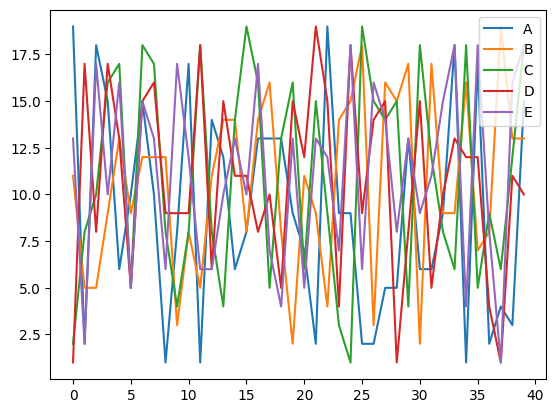

In [140]:
df.plot(kind='line')

<Axes: >

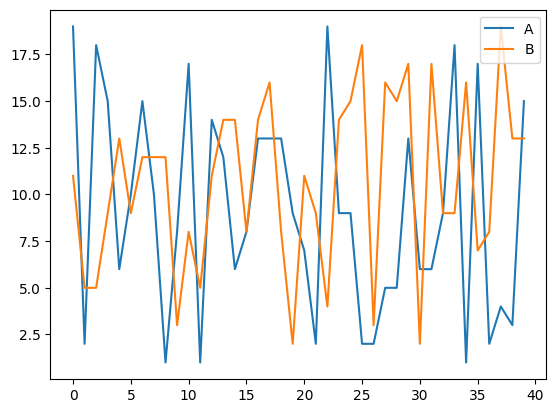

In [142]:
df[['A', 'B']].plot(kind='line')

## 31.3 Bar Plot

In [144]:
df.head()

,A,B,C,D,E
0,19,11,2,1,13
1,2,5,8,17,2
2,18,5,10,8,17
3,15,9,16,17,10
4,6,13,17,13,16


<Axes: >

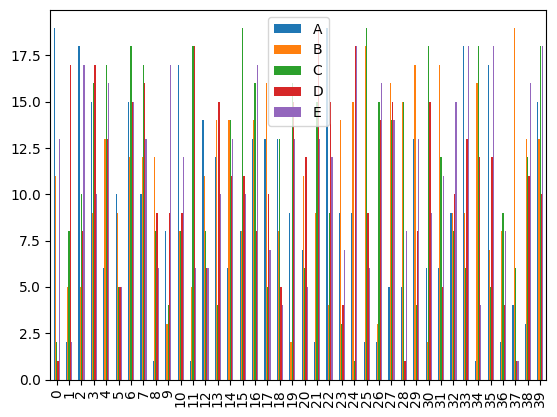

In [145]:
df.plot(kind='bar')

<Axes: >

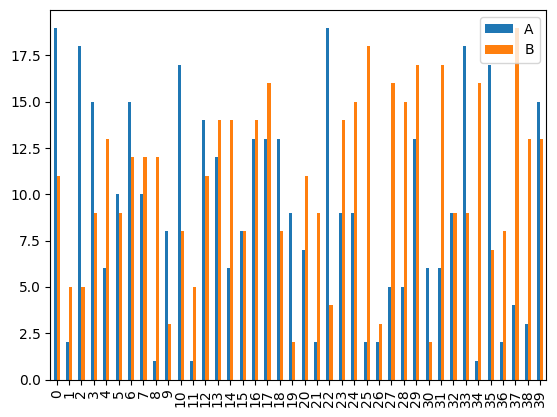

In [146]:
df[['A', 'B']].plot(kind='bar')

<Axes: >

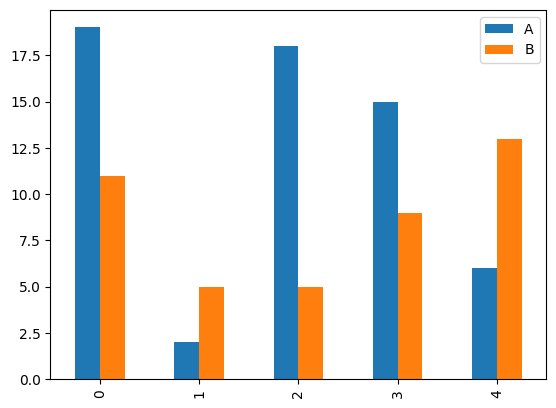

In [147]:
df[['A', 'B']].head().plot(kind='bar')

<Axes: >

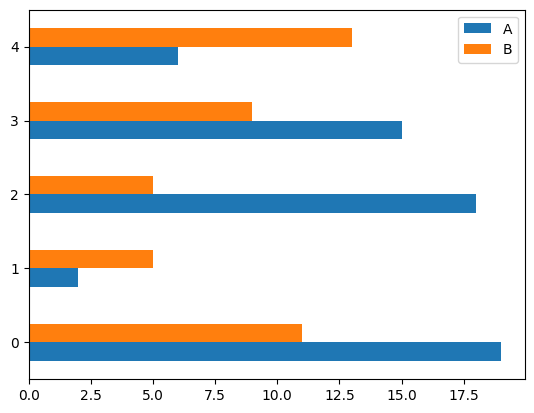

In [148]:
df[['A', 'B']].head().plot(kind='barh')

## 31.4 Area Plot

In [149]:
df.head()

,A,B,C,D,E
0,19,11,2,1,13
1,2,5,8,17,2
2,18,5,10,8,17
3,15,9,16,17,10
4,6,13,17,13,16


<Axes: >

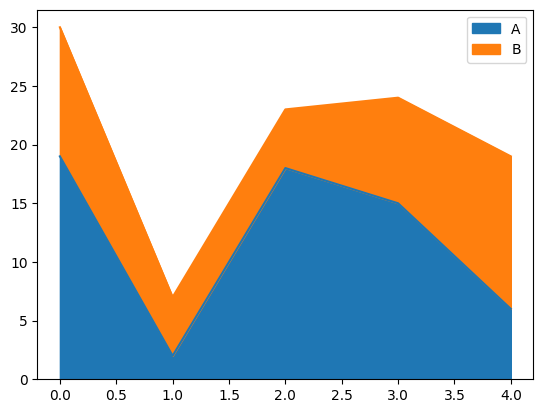

In [150]:
df[['A', 'B']].head().plot(kind='area')

## 31.5 Box Plot

In [151]:
df.head()

,A,B,C,D,E
0,19,11,2,1,13
1,2,5,8,17,2
2,18,5,10,8,17
3,15,9,16,17,10
4,6,13,17,13,16


<Axes: >

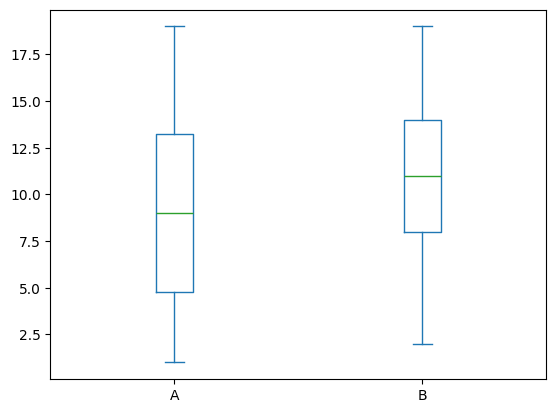

In [152]:
df[['A', 'B']].plot(kind='box')

## 31.6 Histogram

In [154]:
df.head()

,A,B,C,D,E
0,19,11,2,1,13
1,2,5,8,17,2
2,18,5,10,8,17
3,15,9,16,17,10
4,6,13,17,13,16


<Axes: ylabel='Frequency'>

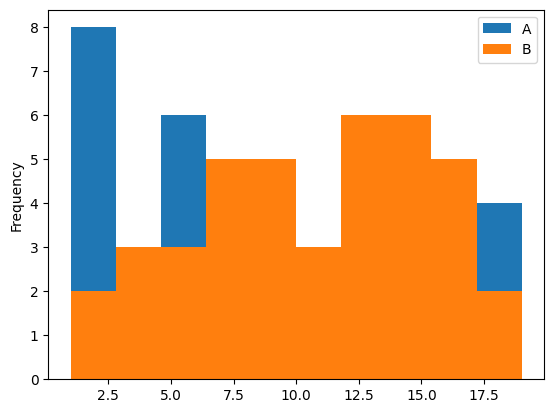

In [155]:
df[['A', 'B']].plot(kind='hist')

## 31.7 Kernel Density Estimation (KDE)

In [157]:
df.head()

,A,B,C,D,E
0,19,11,2,1,13
1,2,5,8,17,2
2,18,5,10,8,17
3,15,9,16,17,10
4,6,13,17,13,16


<Axes: ylabel='Density'>

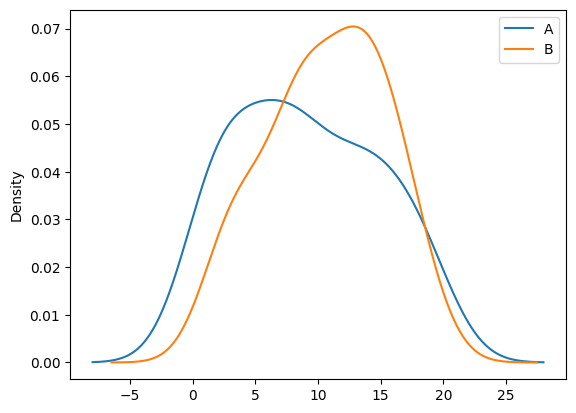

In [158]:
df[['A', 'B']].plot(kind='kde')

## 31.8 Scatter Plot

In [160]:
df.head()

,A,B,C,D,E
0,19,11,2,1,13
1,2,5,8,17,2
2,18,5,10,8,17
3,15,9,16,17,10
4,6,13,17,13,16


<Axes: xlabel='A', ylabel='B'>

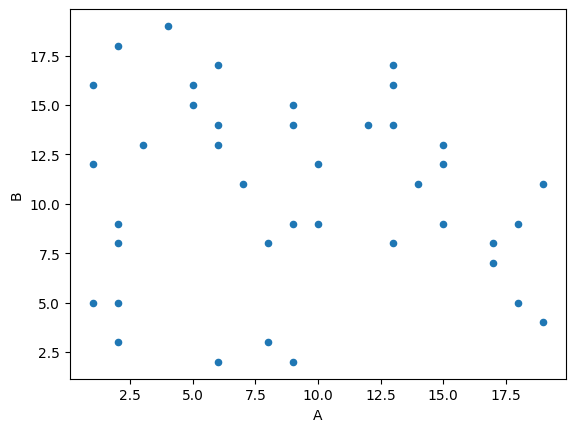

In [162]:
df.plot(x='A', y='B', kind='scatter')

# 32 Nilai Kumulatif pada Pandas

## 32.1 Generate Dataframe

In [2]:
d = {
    'pemain': ['Budi', 'Joni', 'Iwan', 'Budi', 'Budi', 'Iwan', 'Asep', 'Joni'],
    'goal': [2,1,3,1,1,2,2,3]
}
df = pd.DataFrame(d)
df

,pemain,goal
0,Budi,2
1,Joni,1
2,Iwan,3
3,Budi,1
4,Budi,1
5,Iwan,2
6,Asep,2
7,Joni,3


## 32.2 Menampilkan kumulatif (cummulative)

In [3]:
#Menata jumlah goal secara kumulatif
df['goal'].cumsum().to_frame()

,goal
0,2
1,3
2,6
3,7
4,8
5,10
6,12
7,15


In [5]:
df['jumlah_goal_kumulatif'] = df['goal'].cumsum()
df

,pemain,goal,jumlah_goal_kumulatif
0,Budi,2,2
1,Joni,1,3
2,Iwan,3,6
3,Budi,1,7
4,Budi,1,8
5,Iwan,2,10
6,Asep,2,12
7,Joni,3,15


In [6]:
df['jumlah_goal_kumulatif_tiap_pemain'] = df.groupby('pemain')['goal'].cumsum()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain
0,Budi,2,2,2
1,Joni,1,3,1
2,Iwan,3,6,3
3,Budi,1,7,3
4,Budi,1,8,4
5,Iwan,2,10,5
6,Asep,2,12,2
7,Joni,3,15,4


In [7]:
df['cummax'] = df['goal'].cummax()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax
0,Budi,2,2,2,2
1,Joni,1,3,1,2
2,Iwan,3,6,3,3
3,Budi,1,7,3,3
4,Budi,1,8,4,3
5,Iwan,2,10,5,3
6,Asep,2,12,2,3
7,Joni,3,15,4,3


In [8]:
df['cummin'] = df['goal'].cummin()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax,cummin
0,Budi,2,2,2,2,2
1,Joni,1,3,1,2,1
2,Iwan,3,6,3,3,1
3,Budi,1,7,3,3,1
4,Budi,1,8,4,3,1
5,Iwan,2,10,5,3,1
6,Asep,2,12,2,3,1
7,Joni,3,15,4,3,1


In [9]:
df['cumprod'] = df['goal'].cumprod()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax,cummin,cumprod
0,Budi,2,2,2,2,2,2
1,Joni,1,3,1,2,1,2
2,Iwan,3,6,3,3,1,6
3,Budi,1,7,3,3,1,6
4,Budi,1,8,4,3,1,6
5,Iwan,2,10,5,3,1,12
6,Asep,2,12,2,3,1,24
7,Joni,3,15,4,3,1,72


# 33 Mapping Dataframe dengan `applymap`

## 33.1 Generate Dataframe

In [10]:
df = pd.DataFrame({
    'jenis_kelamin': ['Pria', 'Wanita', 'lelaki', 'Lelaki', 'perempuan'],
    'usia': [23, 21, 24, 22, 21],
    'shift': ['pagi', 'siang', 'Malam', 'Siang', 'pagi']
})
df

,jenis_kelamin,usia,shift
0,Pria,23,pagi
1,Wanita,21,siang
2,lelaki,24,Malam
3,Lelaki,22,Siang
4,perempuan,21,pagi


## 33.2 Mapping pada Dataframe dengan `map()`

In [12]:
df = df.map(lambda x:x.lower() if type(x) == str else x)
df

,jenis_kelamin,usia,shift
0,pria,23,pagi
1,wanita,21,siang
2,lelaki,24,malam
3,lelaki,22,siang
4,perempuan,21,pagi


## 33.3 `map()` dengan dictionary

In [13]:
mapping = {
    'pria': 'L',
    'lelaki': 'L',
    'wanita': 'P',
    'perempuan': 'P',
    'pagi':1,
    'siang':2,
    'malam':3
}
df.map(mapping.get)

,jenis_kelamin,usia,shift
0,L,None,1
1,P,None,2
2,L,None,3
3,L,None,2
4,P,None,1


In [14]:
df[['jenis_kelamin', 'shift']] = df[['jenis_kelamin', 'shift']].map(mapping.get)
df

,jenis_kelamin,usia,shift
0,L,23,1
1,P,21,2
2,L,24,3
3,L,22,2
4,P,21,1


# 34 Memadukan Fungsi Agregasi Dengan `transform()`

## 34.1 Generate Dataframe

In [22]:
d = {
    'no_nota': [1,1,1,2,2,3,4,5],
    'kopi': ['latte', 'cappuccino', 'espresso', 'latte', 'espresso', 'cappuccino', 'latte', 'espresso'],
    'harga': [50, 60, 80, 150, 120, 60, 100, 40]
}
df = pd.DataFrame(d)
df

,no_nota,kopi,harga
0,1,latte,50
1,1,cappuccino,60
2,1,espresso,80
3,2,latte,150
4,2,espresso,120
5,3,cappuccino,60
6,4,latte,100
7,5,espresso,40


## 34.2 Menghitung total harga untuk tiap nomor nota

In [23]:
df.groupby('no_nota')['harga'].sum().to_frame()

,harga
no_nota,
1,190
2,270
3,60
4,100
5,40


In [24]:
df['total_harga'] = df.groupby('no_nota')['harga'].transform("sum")
df

,no_nota,kopi,harga,total_harga
0,1,latte,50,190
1,1,cappuccino,60,190
2,1,espresso,80,190
3,2,latte,150,270
4,2,espresso,120,270
5,3,cappuccino,60,60
6,4,latte,100,100
7,5,espresso,40,40


## 34.3 Menghitung total omset untuk tiap jenis kopi yang terjual

In [25]:
df.groupby('kopi')['harga'].sum().to_frame()

,harga
kopi,
cappuccino,120
espresso,240
latte,300


In [26]:
df['total_omset'] = df.groupby('kopi')['harga'].transform("sum")
df

,no_nota,kopi,harga,total_harga,total_omset
0,1,latte,50,190,300
1,1,cappuccino,60,190,120
2,1,espresso,80,190,240
3,2,latte,150,270,300
4,2,espresso,120,270,240
5,3,cappuccino,60,60,120
6,4,latte,100,100,300
7,5,espresso,40,40,240


# 35 Menyatukan Kolom pada Pandas Dengna `str.cat()`

## 35.1 Generate Dataframe

In [27]:
data = {
    'nama': ['bayu', 'indra', 'devi', 'agni'],
    'jenis_kelamin': ['L', 'L', 'P', 'P'],
    'usia': [23,21,22,25]
}
df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,P,25


## 35.2 Menyatukan kolom dengan `str.cat()`

In [29]:
df['nama'].str.cat(df['jenis_kelamin'], sep=', ').to_frame()

,nama
0,"bayu, L"
1,"indra, L"
2,"devi, P"
3,"agni, P"


In [35]:
df['nama_jk'] = df['nama'].str.cat(df['jenis_kelamin'], sep=', ')
df

,nama,jenis_kelamin,usia,nama_jk
0,bayu,L,23,"bayu, L"
1,indra,L,21,"indra, L"
2,devi,P,22,"devi, P"
3,agni,P,25,"agni, P"


In [34]:
df['nama'].str.cat(df['usia'].astype('str'), sep=' - ').to_frame()

,nama
0,bayu - 23
1,indra - 21
2,devi - 22
3,agni - 25


In [37]:
df['nama_usia'] = df['nama'].str.cat(df['usia'].astype('str'), sep=' - ')
df

,nama,jenis_kelamin,usia,nama_jk,nama_usia
0,bayu,L,23,"bayu, L",bayu - 23
1,indra,L,21,"indra, L",indra - 21
2,devi,P,22,"devi, P",devi - 22
3,agni,P,25,"agni, P",agni - 25


# 36 Seleski Baris Dengan Banyak Kriteria Pada Data Frame

## 36.1 Mengakses Dataframe

In [38]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


## 36.2 Seleksi baris dengan banyak kriteria

In [40]:
df[(df['sex']=='female') & (df['age']>=60) & (df['embarked']=='S') & (df['survived']==1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [ ]:
df[
    (df['sex']=='female') &
    (df['age']>=60) &
    (df['embarked']=='S') &
    (df['survived']==1)
]

In [41]:
kr1 = df['sex']=='female'
kr2 = df['age']>60
kr3 = df['embarked']=='S'
kr4 = df['survived']==1

df[kr1 & kr2 & kr3 & kr4]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


# 37 Parameter Header dan Skiprows pada `read_csv`

## 37.1 Mengakses Dataframe

In [5]:
df = pd.read_csv('./data/Iris_error.csv')
df.head()

,1,5.1,3.5,1.4,0.2,Iris-error
0,2,4.9,3.0,1.4,0.2,Iris-error
1,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,4,4.6,3.1,1.5,0.2,Iris-setosa
3,5,5.0,3.6,1.4,0.2,Iris-setosa
4,6,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df = pd.read_csv('./data/Iris_error.csv', header=2, skiprows=[5,6])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4,4.6,3.1,1.5,0.2,Iris-setosa
1,5,5.0,3.6,1.4,0.2,Iris-setosa
2,8,5.0,3.4,1.5,0.2,Iris-setosa
3,9,4.4,2.9,1.4,0.2,Iris-setosa
4,10,4.9,3.1,1.5,0.1,Iris-setosa


# 38 Mengacak Urutan Baris pada Dataframe

## 38.1 Generate Dataframe

In [3]:
n_rows = 6
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 5, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,4,1,2,1,3
1,3,1,3,2,3
2,3,1,2,2,2
3,1,4,3,3,4
4,2,4,2,2,1
5,4,3,4,2,3


## 38.2 Mengacak urutan baris pada Dataframe

In [4]:
df.sample(frac=1.0, random_state=1)

,A,B,C,D,E
2,3,1,2,2,2
1,3,1,3,2,3
4,2,4,2,2,1
0,4,1,2,1,3
3,1,4,3,3,4
5,4,3,4,2,3


In [5]:
df.sample(frac=1.0, random_state=1).reset_index(drop=True)

,A,B,C,D,E
0,3,1,2,2,2
1,3,1,3,2,3
2,2,4,2,2,1
3,4,1,2,1,3
4,1,4,3,3,4
5,4,3,4,2,3


# 39 Akses Sekelompok data pada Dataframe

## 39.1 Mengakses Dataframe

In [6]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


## 39.2 Mengakses sekolompok data yang sudha terkelompok dengan `get_group()`

In [7]:
grouped_df = df.groupby('sex')

In [8]:
grouped_df.get_group('female').head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C


In [26]:
grouped_df = df.groupby(['survived', 'sex'])

In [27]:
grouped_df.get_group((1, 'male')).head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S
22,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C
26,1,1,"Bishop, Mr. Dickinson H",male,25.00,1,0,11967,91.0792,B49,C
29,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.00,0,0,110564,26.5500,C52,S
31,1,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.0000,A31,C
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
47,1,1,"Calderhead, Mr. Edward Pennington",male,42.00,0,0,PC 17476,26.2875,E24,S


# 40 Agregasi pada Banyak Kolom Dataframe dengan `agg`

## 40.1 Mengakses Dataframe

In [2]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


## 40.2 Menerapkan agregasi pada sejumlah kolom dengan `agg()`

In [3]:
df.groupby('pclass').agg({
    'pclass': 'count',
    'age': ['mean', 'max'],
    'survived': 'mean'
})

pclass        age        survived
        count       mean   max      mean
pclass                                  
1         323  39.159930  80.0  0.619195
2         277  29.506705  70.0  0.429603
3         709  24.816367  74.0  0.255289

In [4]:
df.groupby('pclass').agg(n_pass=('pclass', 'count'),
                         avg_age=('age', 'mean'),
                         max_age=('age', 'max'),
                         survival_rate=('survived', 'mean'))

,n_pass,avg_age,max_age,survival_rate
pclass,,,,
1,323,39.159930,80.0,0.619195
2,277,29.506705,70.0,0.429603
3,709,24.816367,74.0,0.255289


# 41 Mengurutkan Data Kolom pada Dataframe

## 41.1 Mengakses Dataframe

In [6]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


## 41.2 Mengurutkan data berdasarkan kolom tertentu

In [7]:
df.sort_values('age').head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
1240,3,1,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
1111,3,0,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S


In [8]:
df.sort_values('age', ascending=False).head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C


In [9]:
df.sort_values(['survived', 'age']).head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
1111,3,0,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
826,3,0,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
937,3,0,"Klasen, Miss. Gertrud Emilia",female,1.00,1,1,350405,12.1833,NaN,S
1101,3,0,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


# 42 Menangani Whitespace pada Pandas

## 42.1 Generate Dataframe

In [10]:
data = {
    'nim': ['10', '11', '12', '13', ' '],
    'nama': ['adi', ' ', 'tejo', ' ', 'bejo']
}
df = pd.DataFrame(data)
df

,nim,nama
0,10,adi
1,11,
2,12,tejo
3,13,
4,,bejo


## 42.2 Menangani Whitespace pada dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nim     5 non-null      object
 1   nama    5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [12]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df

,nim,nama
0,10,adi
1,11,NaN
2,12,tejo
3,13,NaN
4,NaN,bejo


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nim     4 non-null      object
 1   nama    3 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


# 43 Menata  Ulang Kolom Dataframe

## 43.1 Generate Dataframe

In [14]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,8,1,6,6,4
1,3,8,1,7,3
2,8,9,1,8,9
3,2,4,6,9,4
4,5,9,1,3,6


## 43.2 Menata ulang penempatan kolom pada Dataframe

In [15]:
df[['D', 'C', 'A', 'E', 'B']]

,D,C,A,E,B
0,6,6,8,4,1
1,7,1,3,3,8
2,8,1,8,9,9
3,9,6,2,4,4
4,3,1,5,6,9


In [16]:
df

,A,B,C,D,E
0,8,1,6,6,4
1,3,8,1,7,3
2,8,9,1,8,9
3,2,4,6,9,4
4,5,9,1,3,6


In [18]:
df = df[['D', 'C', 'A', 'E', 'B']]
df

,D,C,A,E,B
0,6,6,8,4,1
1,7,1,3,3,8
2,8,1,8,9,9
3,9,6,2,4,4
4,3,1,5,6,9


# 44 Memadukan `loc` dan `iloc` Untuk Seleksi Data

## 44.1 Generate Dataframe

In [19]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


## 44.2 Memadukan `loc` dan `iloc` untuk melakukan seleksi

In [23]:
df.iloc[15:20, :].loc[:, 'name':'age']

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


In [24]:
df.loc[:, 'name':'age'].iloc[15:20, :]

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


# 45. Seleksi Weekdays dan Weekends pada Data Deret Waktu

## 45.1 Generate Dataframe

In [12]:
n_rows = 365
n_cols = 2
cols = ['cols1', 'cols2']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),
                  columns=cols)
df.index = pd.date_range(start='2023-12-31', periods=n_rows, freq='D')
df

,cols1,cols2
2023-12-31,3,1
2024-01-01,18,10
2024-01-02,5,2
2024-01-03,6,11
2024-01-04,14,11
...,...,...
2024-12-25,4,10
2024-12-26,6,19
2024-12-27,12,15
2024-12-28,8,16


## 45.2 Seleksi weekdays dan weekends

In [8]:
weekdays_df = df[df.index.dayofweek.isin([0,1,2,3,4])]
weekdays_df.head()

,cols1,cols2
2024-01-01,17,17
2024-01-02,10,4
2024-01-03,19,4
2024-01-04,9,17
2024-01-05,1,6


In [10]:
weekends_df = df[df.index.dayofweek.isin([5,6])]
weekends_df.head()

,cols1,cols2
2023-12-31,17,16
2024-01-06,7,5
2024-01-07,5,2
2024-01-13,2,2
2024-01-14,13,7


# 46. Penanganan Kolom Dengan Tipe Data Beragam

## 46.1 Generate Dataframe

In [13]:
d = {
    'nama': ['bejo', 'tejo', 'wati', 'tiwi', 'cecep'],
    'ipk': [2, '3', 3, 2.75, '3.25']
}
df = pd.DataFrame(d)
df

,nama,ipk
0,bejo,2
1,tejo,3
2,wati,3
3,tiwi,2.75
4,cecep,3.25


## 46.2 Deteksi dan penanganan kolom dengan tipa data beragam (mixed data types)

In [14]:
df.dtypes

nama    object
ipk     object
dtype: object

In [17]:
df['ipk'].apply(type)

0      <class 'int'>
1      <class 'str'>
2      <class 'int'>
3    <class 'float'>
4      <class 'str'>
Name: ipk, dtype: object

In [18]:
df['ipk'].apply(type).value_counts()

ipk
<class 'int'>      2
<class 'str'>      2
<class 'float'>    1
Name: count, dtype: int64

In [19]:
df['ipk'] = df['ipk'].astype(float)

In [20]:
df['ipk'].apply(type).value_counts()

ipk
<class 'float'>    5
Name: count, dtype: int64

In [21]:
df

,nama,ipk
0,bejo,2.00
1,tejo,3.00
2,wati,3.00
3,tiwi,2.75
4,cecep,3.25


# 47. Cummulative Count pada Pandas

## 47.1 Generate Dataframe

In [24]:
d = {
    'penjual': ['bejo', 'tejo', 'wati', 'bejo', 'cecep', 'tejo', 'wati', 'bejo'],
    'barang': ['monitor', 'monitor', 'keyboard', 'mouse', 'keyboard', 'monitor', 'laptop', 'monitor']
}
df = pd.DataFrame(d)
df

,penjual,barang
0,bejo,monitor
1,tejo,monitor
2,wati,keyboard
3,bejo,mouse
4,cecep,keyboard
5,tejo,monitor
6,wati,laptop
7,bejo,monitor


## 47.2 Mengenal cummulative count dengan `cumcount()`

In [26]:
df['count_tiap_penjual'] = df.groupby('penjual').cumcount()+1
df

,penjual,barang,count_tiap_penjual
0,bejo,monitor,1
1,tejo,monitor,1
2,wati,keyboard,1
3,bejo,mouse,2
4,cecep,keyboard,1
5,tejo,monitor,2
6,wati,laptop,2
7,bejo,monitor,3


In [27]:
df['count_tiap_barang'] = df.groupby('barang').cumcount()+1
df

,penjual,barang,count_tiap_penjual,count_tiap_barang
0,bejo,monitor,1,1
1,tejo,monitor,1,2
2,wati,keyboard,1,1
3,bejo,mouse,2,1
4,cecep,keyboard,1,2
5,tejo,monitor,2,3
6,wati,laptop,2,1
7,bejo,monitor,3,4


In [28]:
df['count_pasangan_barang'] = df.groupby(['penjual','barang']).cumcount()+1
df

,penjual,barang,count_tiap_penjual,count_tiap_barang,count_pasangan_barang
0,bejo,monitor,1,1,1
1,tejo,monitor,1,2,1
2,wati,keyboard,1,1,1
3,bejo,mouse,2,1,1
4,cecep,keyboard,1,2,1
5,tejo,monitor,2,3,2
6,wati,laptop,2,1,1
7,bejo,monitor,3,4,2


# 48. Seleksi Kolom dengan f-string

## 48.1 Mengakses Dataframe

In [29]:
df = pd.read_csv('./data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 48.2 Seleksi kolom dengan `f-string`

In [30]:
df['SepalWidthCm'].to_frame().head()

,SepalWidthCm
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [31]:
part = 'Sepal'
df[f'{part}WidthCm'].to_frame().head()

,SepalWidthCm
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [33]:
df[['PetalWidthCm', 'PetalLengthCm']].head()

,PetalWidthCm,PetalLengthCm
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


In [34]:
part = 'Petal'
df[[f'{part}WidthCm', f'{part}LengthCm']].head()

,PetalWidthCm,PetalLengthCm
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


# 49. Membuat Kolom Baru dengan `for loop` dan `f-string`

## 49.1 Generate Dataframe

In [35]:
d = {
    'penjual': ['bejo', 'tejo', 'wati', 'bejo', 'cecep', 'tejo', 'wati', 'bejo'],
    'barang': ['monitor', 'monitor', 'keyboard', 'mouse', 'keyboard', 'monitor', 'laptop', 'monitor']
}
df = pd.DataFrame(d)
df

,penjual,barang
0,bejo,monitor
1,tejo,monitor
2,wati,keyboard
3,bejo,mouse
4,cecep,keyboard
5,tejo,monitor
6,wati,laptop
7,bejo,monitor


## 49.2 Membuat kolom baru dengan `for loop` dan `f-string`

In [40]:
cols = ['penjual', 'barang']

for col in cols:
    df[f'count_tiap_{cols}'] = df.groupby(col).cumcount()+1
df

,penjual,barang,"count_tiap_['penjual', 'barang']",count_tiap_penjual,count_tiap_barang
0,bejo,monitor,1,1,1
1,tejo,monitor,2,1,2
2,wati,keyboard,1,1,1
3,bejo,mouse,1,2,1
4,cecep,keyboard,2,1,2
5,tejo,monitor,3,2,3
6,wati,laptop,1,2,1
7,bejo,monitor,4,3,4


# 50. Seleksi Baris dengan `between`

## 50.1 Generate Dataframe

In [45]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,4,1,3,7,5
1,3,7,6,3,2
2,1,9,6,9,5
3,2,5,4,7,4
4,6,4,6,5,1
5,3,7,3,9,3
6,6,5,7,8,5
7,3,9,4,6,9
8,7,7,1,5,5
9,3,8,2,2,6


## 50.2 Seleksi baris dengan `between()`

In [47]:
df[df['A'].between(2,5)]

,A,B,C,D,E
0,4,1,3,7,5
1,3,7,6,3,2
3,2,5,4,7,4
5,3,7,3,9,3
7,3,9,4,6,9
9,3,8,2,2,6


In [58]:
df[df['A'].between(2, 5, inclusive='neither')]

,A,B,C,D,E
0,4,1,3,7,5
1,3,7,6,3,2
5,3,7,3,9,3
7,3,9,4,6,9
9,3,8,2,2,6


# 51 Transformasi Kolom Menjadi Baris

## 51.1 Generate Dataframe

In [59]:
d = {
    'kode_area': [123, 456, 789, 321],
    'pabrik': [4,2,5,0],
    'gudang': [2,4,7,3],
    'toko': [64, 32, 15, 24]
}

df = pd.DataFrame(d)
df

,kode_area,pabrik,gudang,toko
0,123,4,2,64
1,456,2,4,32
2,789,5,7,15
3,321,0,3,24


## 51.2 Transformasi kolom menjadi baris

In [60]:
df = df.melt(id_vars='kode_area',
             var_name='jenis_bangunan',
             value_name='jumlah')
df

,kode_area,jenis_bangunan,jumlah
0,123,pabrik,4
1,456,pabrik,2
2,789,pabrik,5
3,321,pabrik,0
4,123,gudang,2
5,456,gudang,4
6,789,gudang,7
7,321,gudang,3
8,123,toko,64
9,456,toko,32


# 52. Membuat Kategori Baru Menurut `threshold`

## 52.1 Generate Dataframe

In [61]:
d = {
    'hobi': ['joging', 'mancing', 'renang',
             'mancing', 'mancing', 'baca',
             'baca', 'mancing', 'fotografi',
             'mancing', 'camping']
}
df = pd.DataFrame(d)
df

,hobi
0,joging
1,mancing
2,renang
3,mancing
4,mancing
5,baca
6,baca
7,mancing
8,fotografi
9,mancing


## 52. Membuat kategori baru berdasarkan threshold(ambang batas)

In [63]:
df['hobi'].value_counts()

,count
hobi,
mancing,5
baca,2
joging,1
renang,1
fotografi,1
camping,1


In [64]:
presentase = df['hobi'].value_counts(normalize=True)
presentase

hobi
mancing      0.454545
baca         0.181818
joging       0.090909
renang       0.090909
fotografi    0.090909
camping      0.090909
Name: proportion, dtype: float64

In [69]:
threshold = 0.1
hobi_lain = presentase[presentase < threshold].index
hobi_lain

Index(['joging', 'renang', 'fotografi', 'camping'], dtype='object', name='hobi')

In [71]:
df['hobi'] = df['hobi'].replace(hobi_lain, 'lainnya')
df['hobi'].to_frame()

,hobi
0,lainnya
1,mancing
2,lainnya
3,mancing
4,mancing
5,baca
6,baca
7,mancing
8,lainnya
9,mancing


In [72]:
df['hobi'].value_counts(normalize=True)

hobi
mancing    0.454545
lainnya    0.363636
baca       0.181818
Name: proportion, dtype: float64

# 53. Menyimpan Data Frame Sebagai File CSV

## 53.1 Generate Dataframe

In [82]:
data = {
    'nama': ['bayu', 'indra', 'devi', 'agni'],
    'jenis_kelamin': ['L', 'L', 'P', 'L'],
    'usia': [23, 21, 22, 25]
}
df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


## 54.2 Menyimpan dataframe sebagai file `CSV`

In [83]:
df.to_csv('data_peserta.csv')

In [84]:
df = pd.read_csv('data_peserta.csv')
df

,Unnamed: 0,nama,jenis_kelamin,usia
0,0,bayu,L,23
1,1,indra,L,21
2,2,devi,P,22
3,3,agni,L,25


In [85]:
df.to_csv('data_peserta.csv', index=False)

In [87]:
df = pd.read_csv('data_peserta.csv')
df

,Unnamed: 0.1,Unnamed: 0,nama,jenis_kelamin,usia
0,0,0,bayu,L,23
1,1,1,indra,L,21
2,2,2,devi,P,22
3,3,3,agni,L,25


# 54. Menghitung Jumlah Baris Menurut Kriteria Tertentu

## 54.1 Generate Dataframe

In [88]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size=(n_rows, n_cols)),
                  columns=cols)
df

,A,B,C,D,E
0,8,4,1,6,3
1,9,8,5,5,6
2,8,8,6,7,2
3,2,3,8,6,3
4,1,1,7,4,9
5,5,8,4,2,5
6,5,1,9,9,4
7,9,2,6,8,2
8,7,3,8,6,5
9,1,7,6,1,7


## 54.2 Menghitung jumlah baris menurut kriteria tertentu

In [89]:
(df['A']<5).sum()

3

In [90]:
(df['A']<5).mean()

0.3

# 55. Mengeluarkan Kolom dari Dataframe

## 55.1 Generate Dataframe

In [93]:
data = {
    'nama': ['bayu', 'indra', 'devi', 'agni'],
    'jenis_kelamin': ['L', 'L', 'P', 'L'],
    'usia': [23, 21, 22, 25]
}
df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


## 55.2 Mengeluarkan kolom dari dataframe

In [94]:
usia = df.pop('usia').to_frame()

In [95]:
df

,nama,jenis_kelamin
0,bayu,L
1,indra,L
2,devi,P
3,agni,L


In [96]:
usia

,usia
0,23
1,21
2,22
3,25
